In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print("Direktori kerja saat ini:", os.getcwd())

Direktori kerja saat ini: c:\Users\Axioo\Desktop\ProjectPythonPengantarStatistikaKelompok


In [3]:
file_path = "WHO-COVID-19-global-daily-data.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [5]:
df_indonesia = df[df["Country"] == "Indonesia"].copy()

In [6]:
df_indonesia["Date_reported"] = pd.to_datetime(df_indonesia["Date_reported"])

In [7]:
summary_stats = df_indonesia[["New_cases", "Cumulative_cases", "New_deaths", "Cumulative_deaths"]].describe()
print(summary_stats)

          New_cases  Cumulative_cases   New_deaths  Cumulative_deaths
count   1635.000000      1.871000e+03  1484.000000        1871.000000
mean    4177.492355      4.560495e+06   109.204178      115071.241582
std     8909.897457      2.712117e+06   259.954432       64630.662758
min       -4.000000      0.000000e+00    -4.000000           0.000000
25%      110.500000      1.592040e+06     4.000000       43134.500000
50%      803.000000      6.185311e+06    19.500000      156940.000000
75%     4405.000000      6.813429e+06   108.000000      161918.000000
max    64718.000000      6.830200e+06  2069.000000      162059.000000


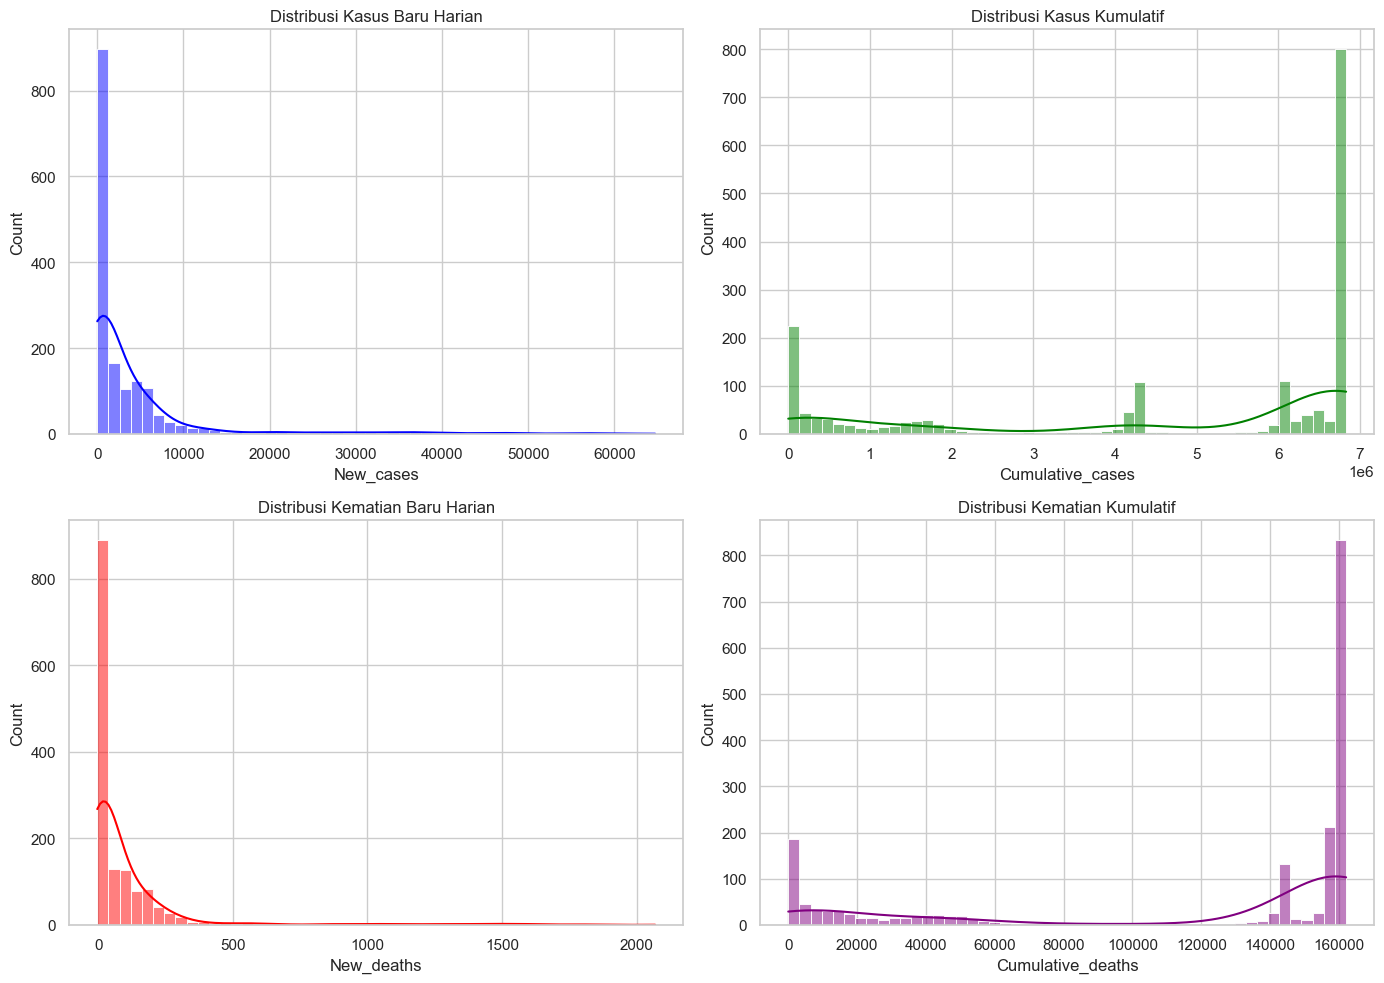

In [20]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_indonesia["New_cases"].dropna(), bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribusi Kasus Baru Harian")

sns.histplot(df_indonesia["Cumulative_cases"], bins=50, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribusi Kasus Kumulatif")

sns.histplot(df_indonesia["New_deaths"].dropna(), bins=50, kde=True, ax=axes[1, 0], color="red")
axes[1, 0].set_title("Distribusi Kematian Baru Harian")

sns.histplot(df_indonesia["Cumulative_deaths"], bins=50, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Distribusi Kematian Kumulatif")

plt.tight_layout()
plt.show()


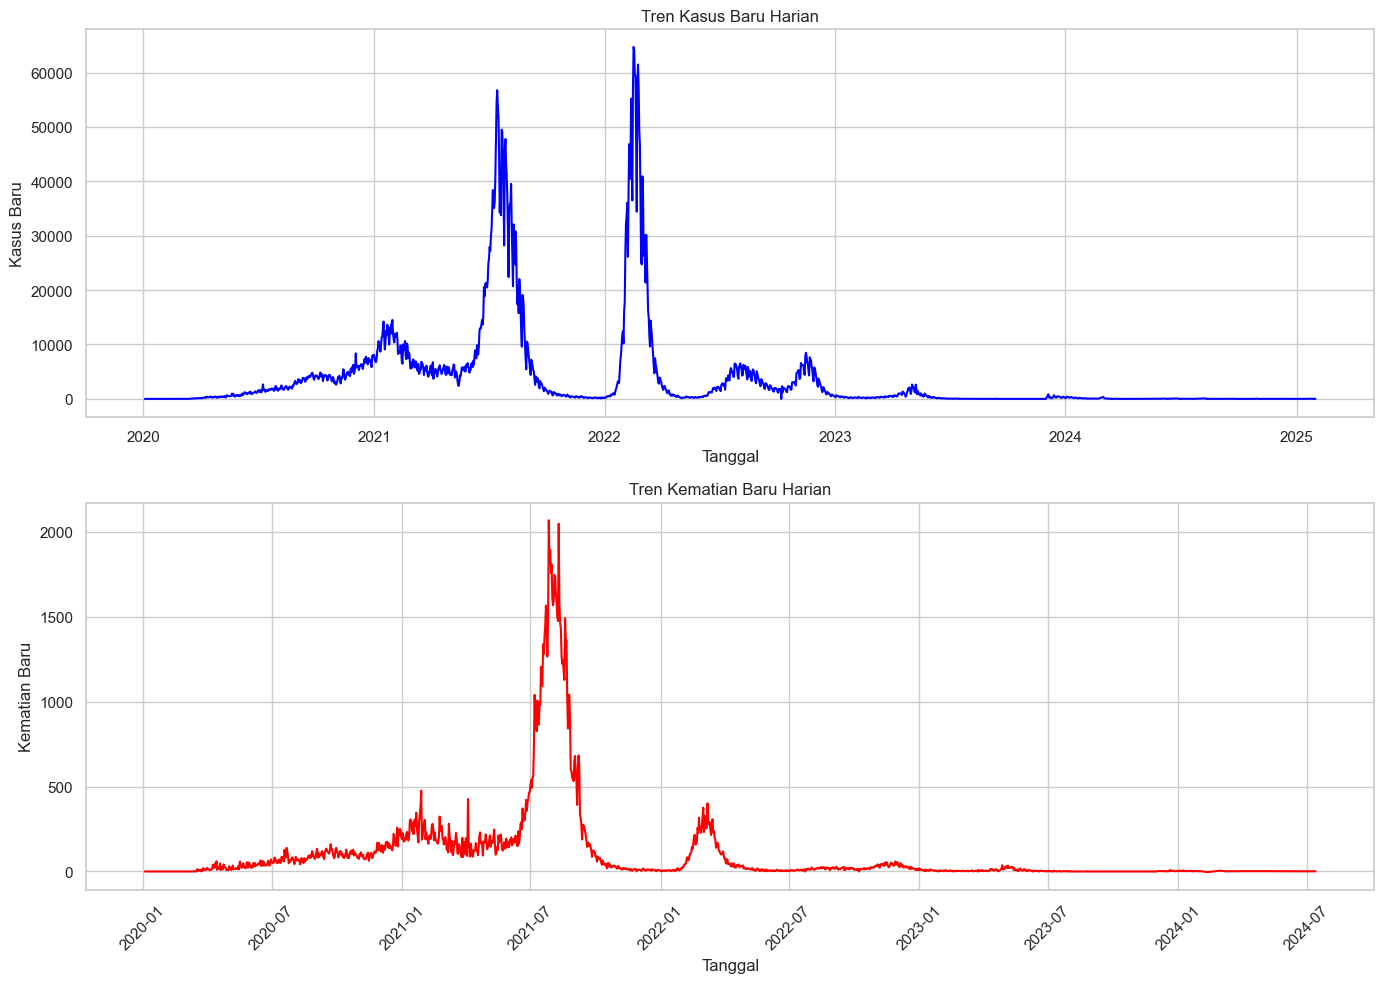

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

sns.lineplot(x=df_indonesia["Date_reported"], y=df_indonesia["New_cases"], ax=axes[0], color="blue")
axes[0].set_title("Tren Kasus Baru Harian")
axes[0].set_xlabel("Tanggal")
axes[0].set_ylabel("Kasus Baru")

sns.lineplot(x=df_indonesia["Date_reported"], y=df_indonesia["New_deaths"], ax=axes[1], color="red")
axes[1].set_title("Tren Kematian Baru Harian")
axes[1].set_xlabel("Tanggal")
axes[1].set_ylabel("Kematian Baru")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Axioo\AppData\Local\Temp\ipykernel_8900\347541585.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cumulative_cases", y="Country", data=top_countries, palette="viridis")


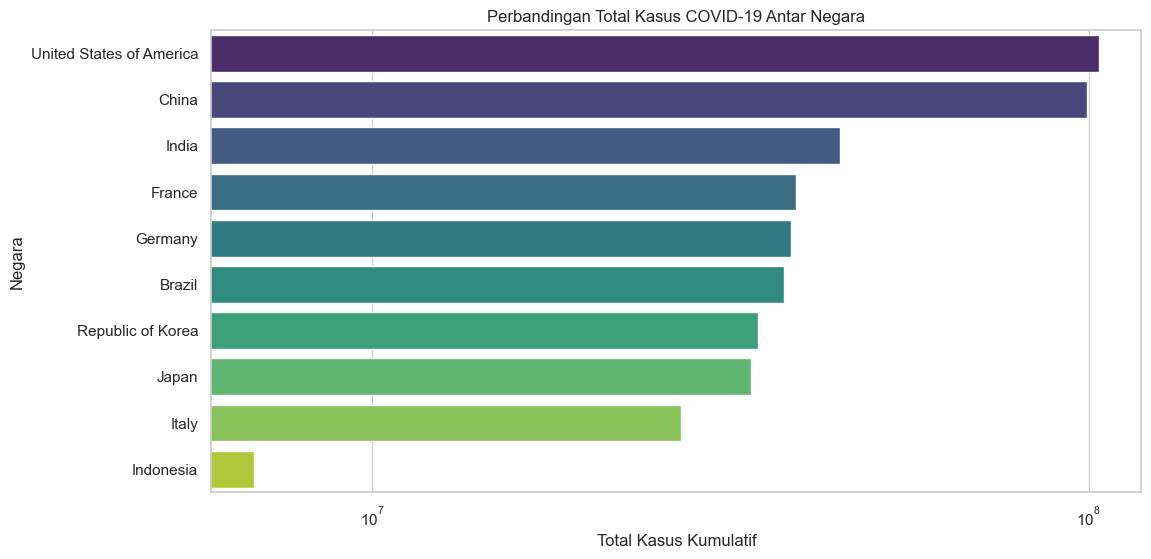

In [ ]:
df_latest = df.groupby("Country")["Cumulative_cases"].max().reset_index()
top_countries = df_latest.nlargest(9, "Cumulative_cases")
if "Indonesia" not in top_countries["Country"].values:
    indonesia_cases = df_latest[df_latest["Country"] == "Indonesia"]
    top_countries = pd.concat([top_countries, indonesia_cases])
top_countries = top_countries.sort_values(by="Cumulative_cases", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Cumulative_cases", y="Country", data=top_countries, palette="viridis")
plt.xlabel("Total Kasus Kumulatif")
plt.ylabel("Negara")
plt.title("Perbandingan Total Kasus COVID-19 Antar Negara")
plt.xscale("log") 
plt.show()

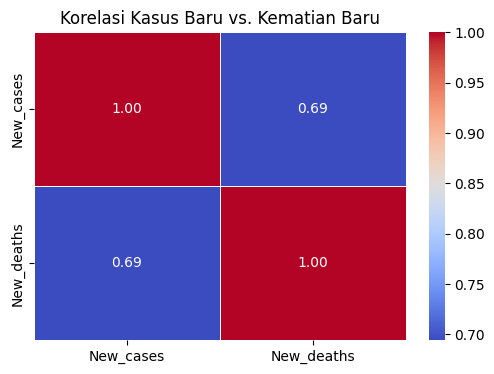

Korelasi antara kasus baru dan kematian baru:
            New_cases  New_deaths
New_cases    1.000000    0.694365
New_deaths   0.694365    1.000000


In [ ]:
df_indonesia = df[df["Country"] == "Indonesia"].copy()

correlation = df_indonesia[["New_cases", "New_deaths"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Korelasi Kasus Baru vs. Kematian Baru")
plt.show()

print("Korelasi antara kasus baru dan kematian baru:")
print(correlation)

In [13]:
# Revisi kelompok 4
import pandas as pd

file_path = "WHO-COVID-19-global-daily-data.csv"
df = pd.read_csv(file_path)

df.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [8]:
df_indonesia = df[df["Country"] == "Indonesia"]

max_case_day = df_indonesia.loc[df_indonesia["New_cases"].idxmax()]
max_case_day


Date_reported        2022-02-16
Country_code                 ID
Country               Indonesia
WHO_region                 SEAR
New_cases               64718.0
Cumulative_cases        4966046
New_deaths                167.0
Cumulative_deaths        145622
Name: 185865, dtype: object

In [9]:
stats = {
    "Tanggal": max_case_day["Date_reported"],
    "Negara": max_case_day["Country"],
    "Kasus Baru": int(max_case_day["New_cases"]),
    "Kasus Kumulatif": int(max_case_day["Cumulative_cases"]),
    "Kematian Baru": int(max_case_day["New_deaths"]),
    "Kematian Kumulatif": int(max_case_day["Cumulative_deaths"]),
}

df_stats = pd.DataFrame([stats])
df_stats


,Tanggal,Negara,Kasus Baru,Kasus Kumulatif,Kematian Baru,Kematian Kumulatif
0,2022-02-16,Indonesia,64718,4966046,167,145622


In [10]:
prev_day = df_indonesia[df_indonesia["Date_reported"] == "2022-02-15"]

if not prev_day.empty:
    prev_cases = prev_day.iloc[0]["New_cases"]
    
    percentage_increase = ((max_case_day["New_cases"] - prev_cases) / prev_cases) * 100
    percentage_increase
else:
    percentage_increase = None

percentage_increase


np.float64(13.442829848025381)

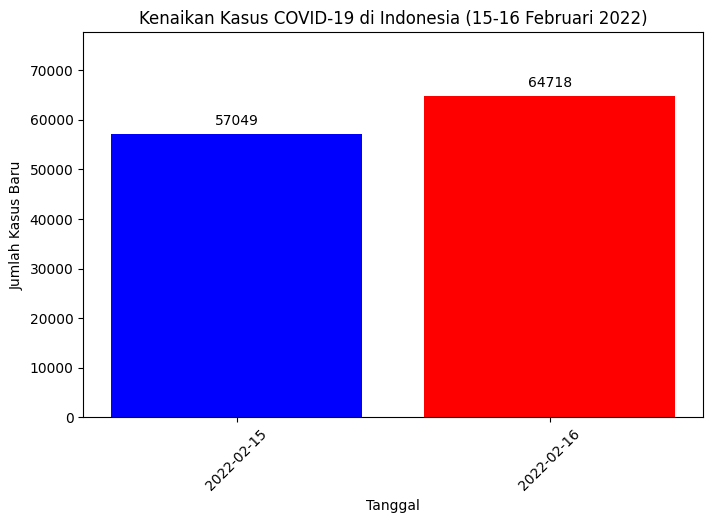

In [11]:
import matplotlib.pyplot as plt

dates = ["2022-02-15", "2022-02-16"]
cases = [prev_cases, max_case_day["New_cases"]]

plt.figure(figsize=(8, 5))
plt.bar(dates, cases, color=['blue', 'red'])

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus Baru")
plt.title("Kenaikan Kasus COVID-19 di Indonesia (15-16 Februari 2022)")
plt.ylim(0, max(cases) * 1.2)  
plt.xticks(rotation=45)
plt.bar_label(plt.bar(dates, cases, color=['blue', 'red']), labels=[f"{int(c)}" for c in cases], padding=5)

plt.show()


In [12]:
import numpy as np

cases_data = [prev_cases, max_case_day["New_cases"]]

interval_size = 5000
min_case = int(min(cases_data) // interval_size) * interval_size
max_case = int(max(cases_data) // interval_size + 1) * interval_size

intervals = np.arange(min_case, max_case + interval_size, interval_size)

freq, bins = np.histogram(cases_data, bins=intervals)

freq_rel = freq / sum(freq) * 100

tally_marks = ["|" * f for f in freq]

class_marks = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

freq_table = pd.DataFrame({
    "Selang (Interval Kelas)": [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins) - 1)],
    "Nilai (Titik Tengah)": class_marks,
    "Turus (Tally)": tally_marks,
    "Fi (Frekuensi)": freq,
    "Fri (Frekuensi Relatif, %)": freq_rel,
    "Tanda Kelas": class_marks
})

freq_table


,Selang (Interval Kelas),Nilai (Titik Tengah),Turus (Tally),Fi (Frekuensi),"Fri (Frekuensi Relatif, %)",Tanda Kelas
0,55000 - 60000,57500.0,|,1,50.0,57500.0
1,60000 - 65000,62500.0,|,1,50.0,62500.0


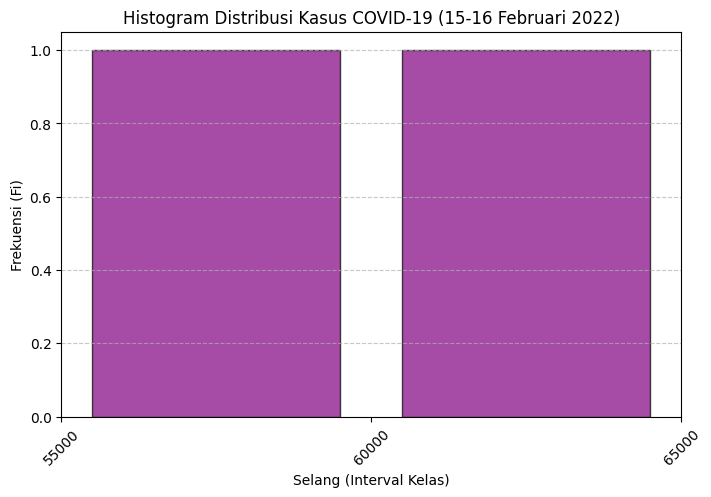

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(cases_data, bins=intervals, color='purple', edgecolor='black', alpha=0.7, rwidth=0.8)

plt.xlabel("Selang (Interval Kelas)")
plt.ylabel("Frekuensi (Fi)")
plt.title("Histogram Distribusi Kasus COVID-19 (15-16 Februari 2022)")

plt.xticks(intervals, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


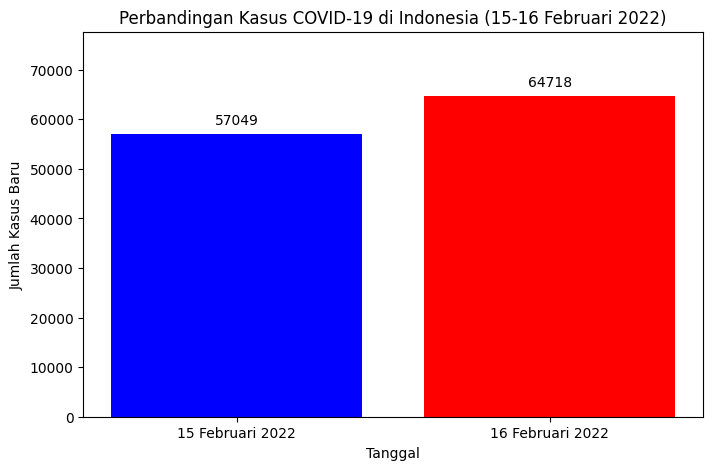

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(["15 Februari 2022", "16 Februari 2022"], cases_data, color=['blue', 'red'])

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus Baru")
plt.title("Perbandingan Kasus COVID-19 di Indonesia (15-16 Februari 2022)")
plt.ylim(0, max(cases_data) * 1.2)  
plt.bar_label(plt.bar(["15 Februari 2022", "16 Februari 2022"], cases_data, color=['blue', 'red']), 
              labels=[f"{int(c)}" for c in cases_data], padding=5)

plt.show()


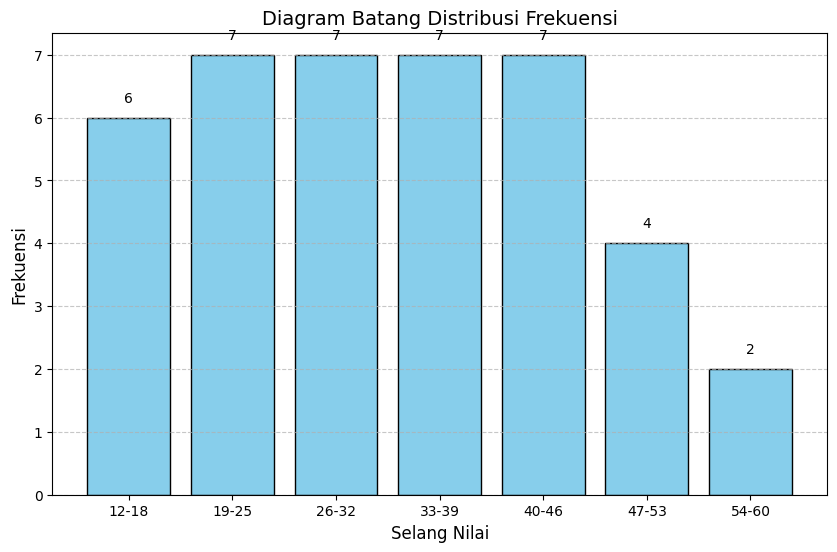

In [ ]:
import matplotlib.pyplot as plt

selang_nilai = ['12-18', '19-25', '26-32', '33-39', '40-46', '47-53', '54-60']
frekuensi = [6, 7, 7, 7, 7, 4, 2]

plt.figure(figsize=(10,6))
plt.bar(selang_nilai, frekuensi, color='skyblue', edgecolor='black')

plt.title('Diagram Batang Distribusi Frekuensi', fontsize=14)
plt.xlabel('Selang Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

for i in range(len(frekuensi)):
    plt.text(i, frekuensi[i] + 0.2, str(frekuensi[i]), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

    